In [1001]:
import pandas as pd
import random
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

# Ultimate Technologies Challenge

## Part 1:

- trend (up, down, or flat?

In [527]:
with open('logins.json', 'r') as file:
    data = json.load(file)
    
data

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [528]:
df = pd.DataFrame(data)
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [529]:
df['login_time'] = pd.to_datetime(df['login_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [530]:
df.set_index('login_time', inplace=True)
df

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21
...
1970-04-13 18:50:19
1970-04-13 18:43:56
1970-04-13 18:54:02


In [531]:
df['login_count'] = 1
df

,login_count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [532]:
logins_15T = df.resample('15T').sum()
logins_15T

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [515]:
logins_15T['date'] = logins_15T.index.date

In [516]:
logins_15T = logins_15T.loc['1970-01-02':'1970-04-12']
logins_15T

,login_count,date
login_time,,
1970-01-02 00:00:00,10,1970-01-02
1970-01-02 00:15:00,18,1970-01-02
1970-01-02 00:30:00,12,1970-01-02
1970-01-02 00:45:00,13,1970-01-02
1970-01-02 01:00:00,9,1970-01-02
...,...,...
1970-04-12 22:45:00,10,1970-04-12
1970-04-12 23:00:00,7,1970-04-12
1970-04-12 23:15:00,12,1970-04-12


In [517]:
logins_15T['hour-minute'] = logins_15T.index.strftime('%H-%M')
logins_15T

/var/folders/w9/7_273fwn0k1d80vwfykk_9640000gn/T/ipykernel_1689/867917886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logins_15T['hour-minute'] = logins_15T.index.strftime('%H-%M')


,login_count,date,hour-minute
login_time,,,
1970-01-02 00:00:00,10,1970-01-02,00-00
1970-01-02 00:15:00,18,1970-01-02,00-15
1970-01-02 00:30:00,12,1970-01-02,00-30
1970-01-02 00:45:00,13,1970-01-02,00-45
1970-01-02 01:00:00,9,1970-01-02,01-00
...,...,...,...
1970-04-12 22:45:00,10,1970-04-12,22-45
1970-04-12 23:00:00,7,1970-04-12,23-00
1970-04-12 23:15:00,12,1970-04-12,23-15


In [518]:
logins = logins_15T.pivot_table(index='date', columns='hour-minute', values='login_count')

In [519]:
logins

hour-minute,00-00,00-15,00-30,00-45,01-00,01-15,01-30,01-45,02-00,02-15,...,21-30,21-45,22-00,22-15,22-30,22-45,23-00,23-15,23-30,23-45
date,,,,,,,,,,,,,,,,,,,,,
1970-01-02,10,18,12,13,9,8,10,6,7,18,...,11,14,15,18,21,17,12,12,12,15
1970-01-03,5,10,7,17,13,13,17,11,22,21,...,6,10,12,15,19,17,13,17,12,15
1970-01-04,11,14,15,12,7,15,29,25,21,32,...,4,6,9,4,6,7,2,7,5,6
1970-01-05,8,3,7,4,7,5,7,5,5,1,...,6,4,4,8,3,10,7,6,7,5
1970-01-06,7,4,7,7,8,5,5,4,4,5,...,8,23,24,19,11,12,9,7,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-04-08,6,12,10,9,13,13,16,9,11,7,...,15,8,15,14,11,20,29,12,12,19
1970-04-09,18,7,16,12,21,13,10,15,14,9,...,15,28,15,22,19,17,10,16,17,17
1970-04-10,17,15,21,21,19,16,24,11,15,13,...,21,27,18,38,37,26,25,16,8,17


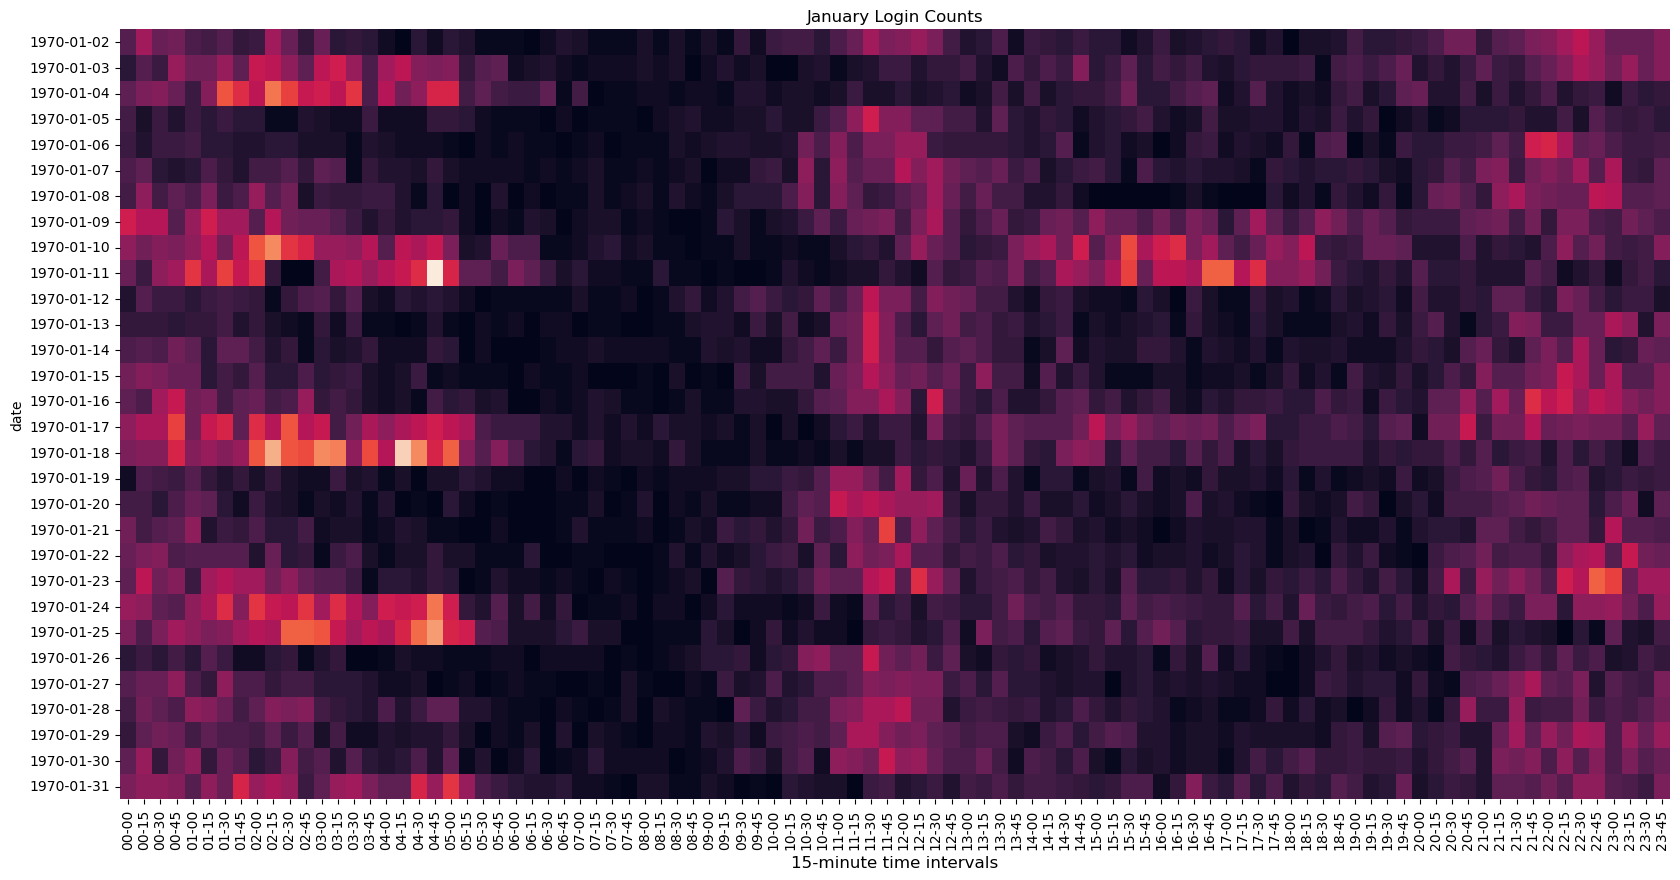

In [525]:
plt.figure(figsize=(20,10))
sns.heatmap(logins.iloc[:30], cbar=False)
plt.xlabel('15-minute time intervals', fontsize=12)
plt.title('January Login Counts')
plt.savefig("figpath.png", dpi=400)
plt.show()

In [454]:
logins.index = pd.to_datetime(logins.index)

In [455]:
logins['weekday'] = logins.index.strftime('%A')

weekday_order = ["Monday", "Tuesday", "Wednesday", 
                 "Thursday", "Friday", "Saturday", "Sunday"]

logins['weekday'] = pd.Categorical(logins['weekday'], 
                                   categories=weekday_order, ordered=True)

In [456]:
weekdays = logins.groupby('weekday').mean()
weekdays

hour-minute,00-00,00-15,00-30,00-45,01-00,01-15,01-30,01-45,02-00,02-15,...,21-30,21-45,22-00,22-15,22-30,22-45,23-00,23-15,23-30,23-45
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,8.142857,9.428571,9.714286,8.357143,7.357143,7.500000,7.285714,6.285714,5.714286,4.428571,...,12.000000,10.357143,11.071429,11.642857,10.000000,10.928571,8.214286,10.142857,10.142857,9.500000
Tuesday,10.500000,10.785714,11.428571,10.642857,10.285714,9.285714,11.714286,9.142857,7.785714,7.928571,...,14.000000,13.500000,13.785714,12.785714,14.357143,13.214286,14.500000,14.142857,10.571429,12.500000
Wednesday,11.285714,12.714286,12.642857,12.428571,14.357143,13.071429,11.500000,10.071429,10.428571,8.785714,...,15.214286,13.000000,17.285714,16.285714,15.857143,13.785714,14.714286,15.785714,17.785714,16.571429
Thursday,15.285714,15.142857,14.428571,13.428571,14.285714,15.000000,13.357143,12.857143,11.642857,12.357143,...,15.500000,17.500000,18.857143,17.785714,20.000000,19.642857,19.500000,17.285714,16.714286,16.142857
Friday,15.800000,17.533333,15.466667,16.200000,17.266667,15.933333,16.400000,14.200000,13.266667,13.866667,...,19.000000,23.000000,21.866667,27.733333,27.066667,24.600000,24.400000,22.866667,19.466667,19.800000
Saturday,19.800000,21.933333,20.866667,21.000000,23.800000,26.200000,28.733333,25.400000,28.000000,28.066667,...,16.533333,17.400000,18.933333,19.000000,19.066667,20.466667,17.066667,17.333333,16.666667,16.000000
Sunday,17.333333,18.266667,19.800000,19.466667,18.600000,22.333333,25.266667,24.133333,25.400000,28.000000,...,11.000000,12.200000,10.600000,8.266667,9.866667,10.133333,9.200000,8.866667,8.466667,10.600000


In [503]:
xlabels = ["" for _ in range(96)]
xlabels[12] = '3 am'
xlabels[48] = 'noon'
xlabels[84] = '9 pm'

In [506]:
pwd

'/Users/dennisfrancis/Desktop/ultimate_challenge'

/var/folders/w9/7_273fwn0k1d80vwfykk_9640000gn/T/ipykernel_1689/1320844323.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels, rotation=0, fontsize=12)


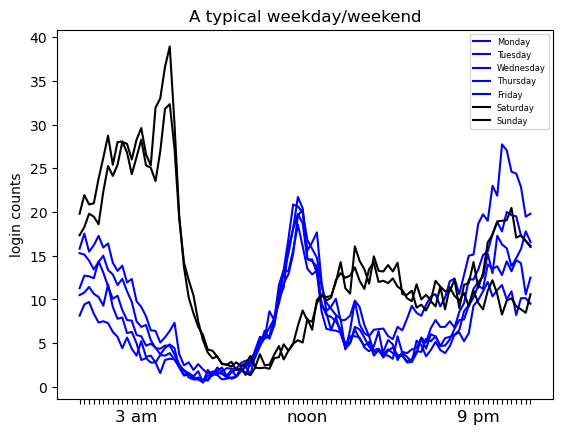

In [507]:
fig, ax = plt.subplots()
#fig.figure(figsize=(10,6))
for day in weekdays.index:
    if day not in ['Saturday', 'Sunday']:
        ax.plot(weekdays.loc[day], label=day, color='b')
    else:
        ax.plot(weekdays.loc[day], label=day, color='k')
ax.legend(fontsize=6)

ax.set_xticklabels(xlabels, rotation=0, fontsize=12)

ax.set_ylabel('login counts')
ax.set_title('A typical weekday/weekend')

fig.savefig("figpath.png", dpi=400)
plt.show()



In [552]:
logins = logins_15T

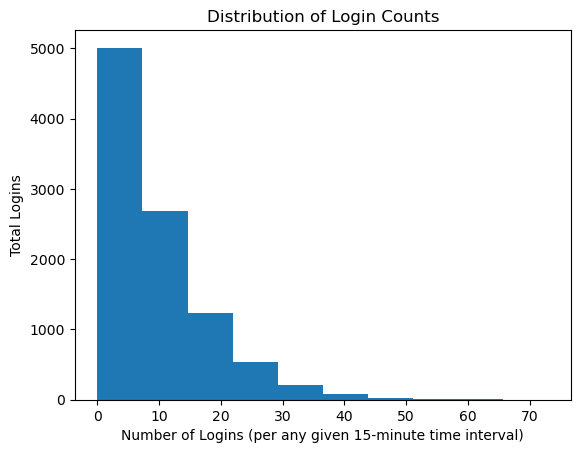

In [559]:
plt.hist(logins, bins=10)
plt.title("Distribution of Login Counts")
plt.xlabel("Number of Logins (per any given 15-minute time interval)")
plt.ylabel("Total Logins")
plt.savefig("histogram.png", dpi=400)
plt.show()

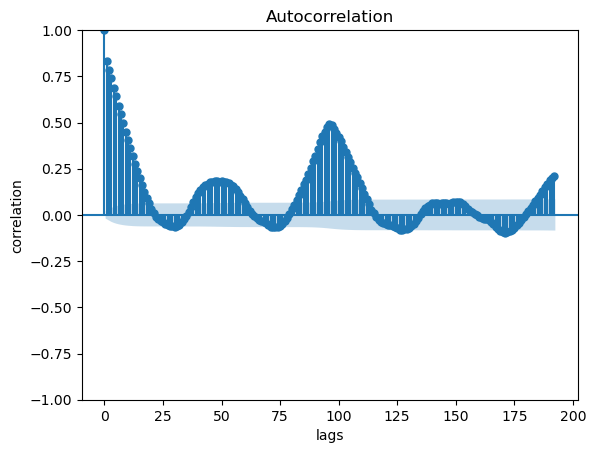

In [578]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(logins, lags=96*2)
plt.xlabel("lags")
plt.ylabel("correlation")
plt.savefig("plot_acf.png", dpi=400)
plt.show()

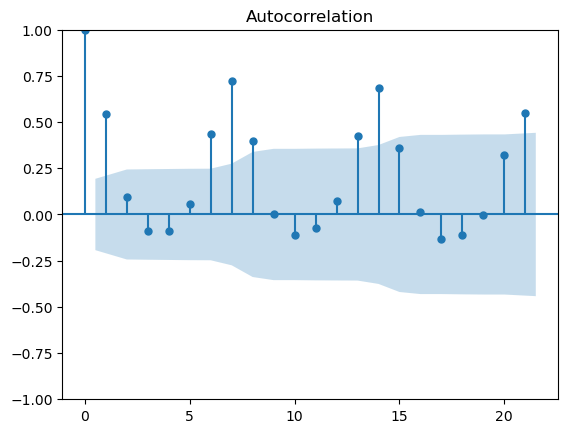

In [86]:
plot_acf(logs_1d)
plt.show()

In [569]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(logins, period=24)  # Adjust the period based on your data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

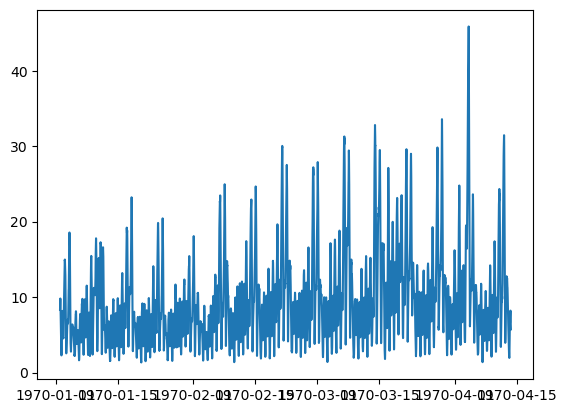

In [573]:
plt.plot(trend)

In [577]:
logins[logins['login_count'] > 65]

,login_count
login_time,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66


In [596]:
xlabels = ["" for _ in range(9789)]
xlabels[0] = "January 1st, 1970"
xlabels[7]

''

In [597]:
logins

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


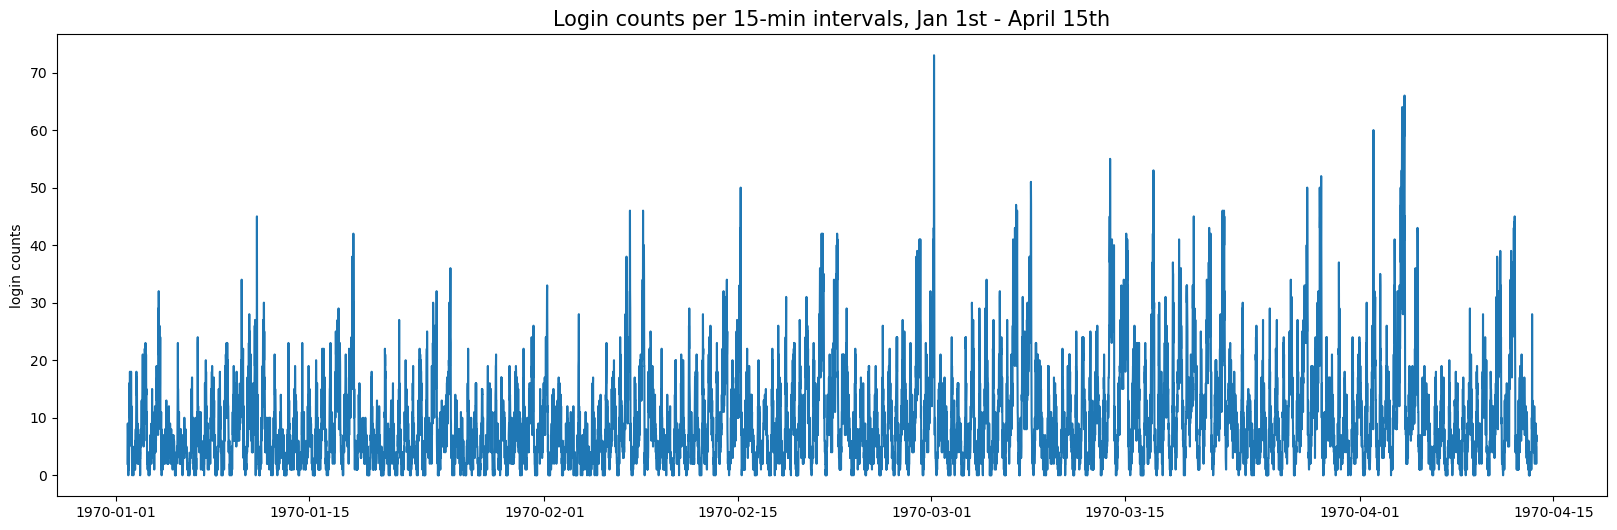

In [608]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(logins)

#ax.set_xticklabels(xlabels, rotation=0, fontsize=12)

ax.set_ylabel('login counts')
ax.set_title('Login counts per 15-min intervals, Jan 1st - April 15th', fontsize=15)

fig.savefig("series.png", dpi=400)
plt.show()

# Part 3 - Predictive Modeling

In [1029]:
with open('ultimate_data_challenge.json', 'r') as file:
    data = json.load(file)
    
data

[{'city': "King's Landing",
  'trips_in_first_30_days': 4,
  'signup_date': '2014-01-25',
  'avg_rating_of_driver': 4.7,
  'avg_surge': 1.1,
  'last_trip_date': '2014-06-17',
  'phone': 'iPhone',
  'surge_pct': 15.4,
  'ultimate_black_user': True,
  'weekday_pct': 46.2,
  'avg_dist': 3.67,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 0,
  'signup_date': '2014-01-29',
  'avg_rating_of_driver': 5.0,
  'avg_surge': 1.0,
  'last_trip_date': '2014-05-05',
  'phone': 'Android',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 50.0,
  'avg_dist': 8.26,
  'avg_rating_by_driver': 5.0},
 {'city': 'Astapor',
  'trips_in_first_30_days': 3,
  'signup_date': '2014-01-06',
  'avg_rating_of_driver': 4.3,
  'avg_surge': 1.0,
  'last_trip_date': '2014-01-07',
  'phone': 'iPhone',
  'surge_pct': 0.0,
  'ultimate_black_user': False,
  'weekday_pct': 100.0,
  'avg_dist': 0.77,
  'avg_rating_by_driver': 5.0},
 {'city': "King's Landing",
  'trips_in_fir

In [1030]:
df = pd.DataFrame(data)
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [1031]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [1032]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [1033]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [1034]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [1035]:
df.loc[0,'signup_date']

Timestamp('2014-01-25 00:00:00')

In [1036]:
df.loc[1,'signup_date']

Timestamp('2014-01-29 00:00:00')

In [1037]:
df.loc[0,'signup_date'] - df.loc[1,'signup_date']

Timedelta('-4 days +00:00:00')

## Determining our dependent variable y

We need to define what users in the data have a '1' for active and a '0' for non active. '1' means that the user had a trip in the last thirty days. The last trip records we have in this data set are July 1 2014, so any user that had a ride in the preceding 30 days June 1, 2014 onward. 

#### Range of the data

The first signups occured on January 1, 2014 and the last signup was on January 31, 2014:

In [1038]:
df['signup_date'].min()

Timestamp('2014-01-01 00:00:00')

In [1039]:
df['signup_date'].max()

Timestamp('2014-01-31 00:00:00')

##### The last trip dates were:
the last trip date 

In [1040]:
df['last_trip_date'].min()

Timestamp('2014-01-01 00:00:00')

In [1041]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

Check this out: 128 people quit after the first day:

In [1042]:
df[df['last_trip_date'] == df['last_trip_date'].min()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
71,Astapor,1,2014-01-01,5.0,1.00,2014-01-01,Android,0.0,False,100.0,1.02,5.0
298,Astapor,1,2014-01-01,5.0,1.25,2014-01-01,Android,100.0,False,100.0,10.43,5.0
1731,Astapor,1,2014-01-01,NaN,1.00,2014-01-01,iPhone,0.0,True,100.0,3.78,5.0
3024,Astapor,1,2014-01-01,5.0,2.25,2014-01-01,Android,100.0,False,100.0,3.23,5.0
3112,Winterfell,1,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,3.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48262,King's Landing,1,2014-01-01,5.0,1.00,2014-01-01,Android,0.0,False,100.0,13.86,5.0
48271,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,iPhone,0.0,True,100.0,8.05,5.0
48703,Astapor,2,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,3.14,3.0
49545,King's Landing,1,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,1.23,5.0


In [1043]:
128/50000

0.00256

Set users from June 1, 2014 onwards to "1" for active, "0" otherwise.

In [1044]:
df['active'] = 0

In [1045]:
df['last_trip_date'].max() >= datetime(2014, 7, 1)

True

In [1046]:
mask = df['last_trip_date'] >= datetime(2014, 6, 1)
df.loc[mask, 'active'] = 1

In [1047]:
df

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2,1
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0,0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0,0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5,0


### Preprocessing
#### Extracting features from datetime column:

We cannot pass datetime objects into a machine learning model, but we can still extract some features.

##### Day of the week that the user signed up:
We'll have to one-hot-encode this as well in a later step.

In [1048]:
df.loc[0,'signup_date'].strftime('%a')

'Sat'

In [1049]:
df['signup_day'] = df['signup_date'].dt.strftime('%a')

##### Quit within the first week
This might help the model learn more about people who really aren't interested in the platform

In [1050]:
mask = df['last_trip_date'] <= datetime(2014, 1, 7)
df['quit_1st_week'] = 0
df.loc[mask, 'quit_1st_week'] = 1

##### Quit within the first month

In [1051]:
mask = df['last_trip_date'] <= datetime(2014, 2, 1)
df['quit_1st_month'] = 0
df.loc[mask, 'quit_1st_month'] = 1

In [1052]:
df['quit_1st_month'].sum()

10625

In [1053]:
df['quit_1st_week'].sum()

1261

##### Days since last ride


In [1054]:
df['elapsed_days'] = df['last_trip_date'] - datetime(2014, 7, 1)

In [1055]:
df['elapsed_days'] = df['elapsed_days'].dt.days.astype(int) * -1

##### Drop the datetime object columns

In [1056]:
df.drop(columns=['signup_day', 'last_trip_date'], inplace=True)

In [1061]:
df.drop(columns='signup_date', inplace=True)

##### Impute missing values

we need to impute missing values for 'avg_rating_of_driver', 'phone', and 'avg_rating_by_driver'

In [1062]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    41878 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   49604 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    49799 non-null  float64
 10  active                  50000 non-null  int64  
 11  quit_1st_week           50000 non-null  int64  
 12  quit_1st_month          50000 non-null  int64  
 13  elapsed_days            50000 non-null  int64  
dtypes: bool(1), float64(6), int64(5), obje

In [1063]:
impute_value = df['phone'].mode()[0]
impute_value

'iPhone'

In [1064]:
df['phone'].fillna(impute_value, inplace=True)

In [1065]:
impute_value = df['avg_rating_of_driver'].mode()[0]
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(impute_value)

In [1066]:
imput_value = df['avg_rating_by_driver'].mode()[0]
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(impute_value)

In [1067]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  bool   
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active                  50000 non-null  int64  
 11  quit_1st_week           50000 non-null  int64  
 12  quit_1st_month          50000 non-null  int64  
 13  elapsed_days            50000 non-null  int64  
dtypes: bool(1), float64(6), int64(5), obje

In [1068]:
pre_df = pd.get_dummies(df)

In [1069]:
pre_df['ultimate_black_user'] = pre_df['ultimate_black_user'].astype(int)

In [1070]:
pre_df

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,quit_1st_week,quit_1st_month,elapsed_days,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,0,14,0,1,0,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0,0,57,1,0,0,1,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,1,1,175,1,0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,0,2,0,1,0,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,0,108,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5.0,1.00,0.0,0,100.0,5.63,4.2,1,0,0,26,0,1,0,0,1
49996,1,5.0,1.00,0.0,0,0.0,0.00,4.0,0,0,1,157,1,0,0,0,1
49997,0,5.0,1.00,0.0,1,100.0,3.86,5.0,0,0,0,40,0,0,1,1,0
49998,2,3.0,1.00,0.0,0,100.0,4.58,3.5,0,0,1,167,1,0,0,0,1


In [1071]:
pre_df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'quit_1st_week', 'quit_1st_month',
       'elapsed_days', 'city_Astapor', 'city_King's Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone'],
      dtype='object')

In [1072]:
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'quit_1st_week', 'quit_1st_month',
       'elapsed_days', 'city_Astapor', "city_King's Landing",
       'city_Winterfell', 'phone_Android', 'phone_iPhone']

In [1073]:
X = pre_df[features]
y = df['active']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1074]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [1075]:
rf_classifier.fit(X_train, y_train)
preds = rf_classifier.predict(X_test)

In [1076]:
accuracy = accuracy_score(y_test, preds)
accuracy

1.0

In [1077]:
classification_report(y_test, preds)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      6219\n           1       1.00      1.00      1.00      3781\n\n    accuracy                           1.00     10000\n   macro avg       1.00      1.00      1.00     10000\nweighted avg       1.00      1.00      1.00     10000\n'

In [1078]:
# Create a Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression(random_state=42)

In [1079]:
logreg_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [1080]:
predictions = logreg_model.predict(X_test)

In [1081]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.9966

In [866]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [867]:
cv_scores

array([0.9962, 0.9968, 0.9951, 0.9955, 0.9954])

In [869]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

In [870]:
cv_scores

array([1., 1., 1., 1., 1.])

In [884]:
rf_classifier = RandomForestClassifier(n_estimators=2, max_depth=1, random_state=42)

In [885]:
cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='accuracy')

In [886]:
cv_scores

array([1., 1., 1., 1., 1.])

#### 100% accuracy with 5-fold cross validation is suspicious.
Data leakage may be occuring, or the features were not engineered properly. This model is not helpful.

In [887]:
df

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,quit_1st_week,quit_1st_month,elapsed_days
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1,0,0,14
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0,0,0,57
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0,1,1,175
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1,0,0,2
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0,0,0,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,5.0,1.00,iPhone,0.0,False,100.0,5.63,4.2,1,0,0,26
49996,Astapor,1,5.0,1.00,iPhone,0.0,False,0.0,0.00,4.0,0,0,1,157
49997,Winterfell,0,5.0,1.00,Android,0.0,True,100.0,3.86,5.0,0,0,0,40
49998,Astapor,2,3.0,1.00,iPhone,0.0,False,100.0,4.58,3.5,0,0,1,167


In [888]:
X = df[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_rating_by_driver']]

In [890]:
y = df['active']

In [891]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [893]:
model = LogisticRegression(random_state=42)

In [895]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [896]:
preds = model.predict(X_test)

In [897]:
accuracy_score(preds, y_test)

0.6544

#### This seems more plausible
Before Logistic regression was obtaining accuracy of .99. I suspect it has to do with the feature engineering regarding the datetime columns like 'start_date' and 'last_trip'. In reality, these features will not be used as predictive features. When making predictions, we will not know when the user will decide to stop or quit the service. We included columns like 'quit_first_week' and 'quit_1st_month', but these columns do not make sense at this point. We have to give these users the benefit of the doubt that they may sign un at the last minute and hence deemed "active" users. So we must omit this information from the model: 'quit_1st_week', 'quit_1st_month', 'elapsed_days' (since quitting).

In [899]:
drop_cols = ['quit_1st_week', 'quit_1st_month', 'elapsed_days']

In [900]:
pre_df.drop(columns=drop_cols, inplace=True)

In [906]:
pre_df.columns

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'active', 'city_Astapor', 'city_Kings Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone'],
      dtype='object')

In [905]:
pre_df.rename(columns={"city_King's Landing": 'city_Kings Landing'}, inplace=True)


In [992]:
features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'city_Astapor', 'city_Kings Landing',
       'city_Winterfell', 'phone_Android', 'phone_iPhone']

In [993]:
X = pre_df[features]
y = df['active']

In [994]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(random_state=42)

In [995]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [996]:
preds = model.predict(X_test)
accuracy_score(preds, y_test)

0.7164

#### 71.64% accuracy

In [997]:
model = RandomForestClassifier(n_estimators=100,max_depth=5, random_state=42)

In [998]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
accuracy_score(preds, y_test)

0.7708

In [1021]:
feature_importances = model.feature_importances_
important = pd.DataFrame({'Feature':X.columns, 'Importance': feature_importances})
important.sort_values(by='Importance', ascending=False, inplace=True)
plt.bar(important['Feature'], important['Importance'])
plt.xlabel('Feature')
plt.xticks(rotation=80, fontsize=6)
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.savefig("feature_importance.png", dpi=400)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'figsize'

In [1002]:
from sklearn.metrics import confusion_matrix

In [1003]:
confusion_matrix(y_test, predictions)

array([[6210,    9],
       [  25, 3756]])

In [1004]:

from sklearn.metrics import plot_confusion_matrix

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


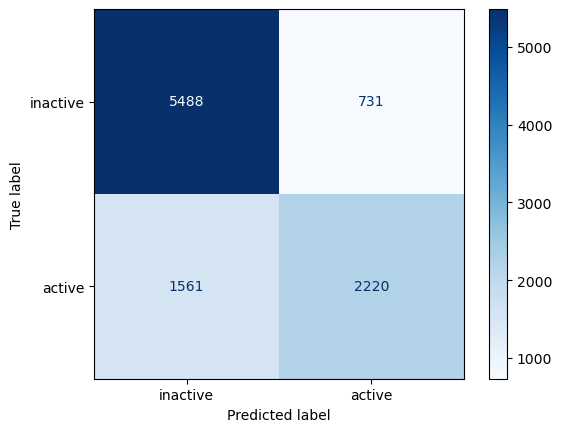

In [1013]:
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, 
                      display_labels=['inactive', 'active'])
plt.savefig("confusion matrix.png", dpi=400)

#### What was the deal with elapsed days?

In [986]:
X = df[['elapsed_days']]
y = df[['active']]

In [987]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42)

In [988]:
model = LogisticRegression()

In [989]:
model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [990]:
preds = model.predict(y_test)
accuracy_score(preds, y_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- active
Feature names seen at fit time, yet now missing:
- elapsed_days

  warnings.warn(message, FutureWarning)


0.3781